# Importing libraries

In [73]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Reading csv

In [75]:
data = pd.read_csv('star.csv')



# Initial PreProcessing

In [77]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [78]:
y = data["class"]
X = data[["alpha","delta","u","g","r","i","z"]]
y.shape, X.shape

((100000,), (100000, 7))

In [79]:
data.dtypes


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [80]:
for column in data.columns:
    print(column, len(data[data[column].isna()]))
    

obj_ID 0
alpha 0
delta 0
u 0
g 0
r 0
i 0
z 0
run_ID 0
rerun_ID 0
cam_col 0
field_ID 0
spec_obj_ID 0
class 0
redshift 0
plate 0
MJD 0
fiber_ID 0


In [81]:
data = data.drop(
    columns=["obj_ID", "run_ID", "rerun_ID",
             "field_ID", "spec_obj_ID", "fiber_ID",
             "plate", "MJD", "cam_col"])

In [82]:
from sklearn.preprocessing import LabelEncoder
class_encoder = LabelEncoder()
data['class'] = class_encoder.fit_transform(data['class'])


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


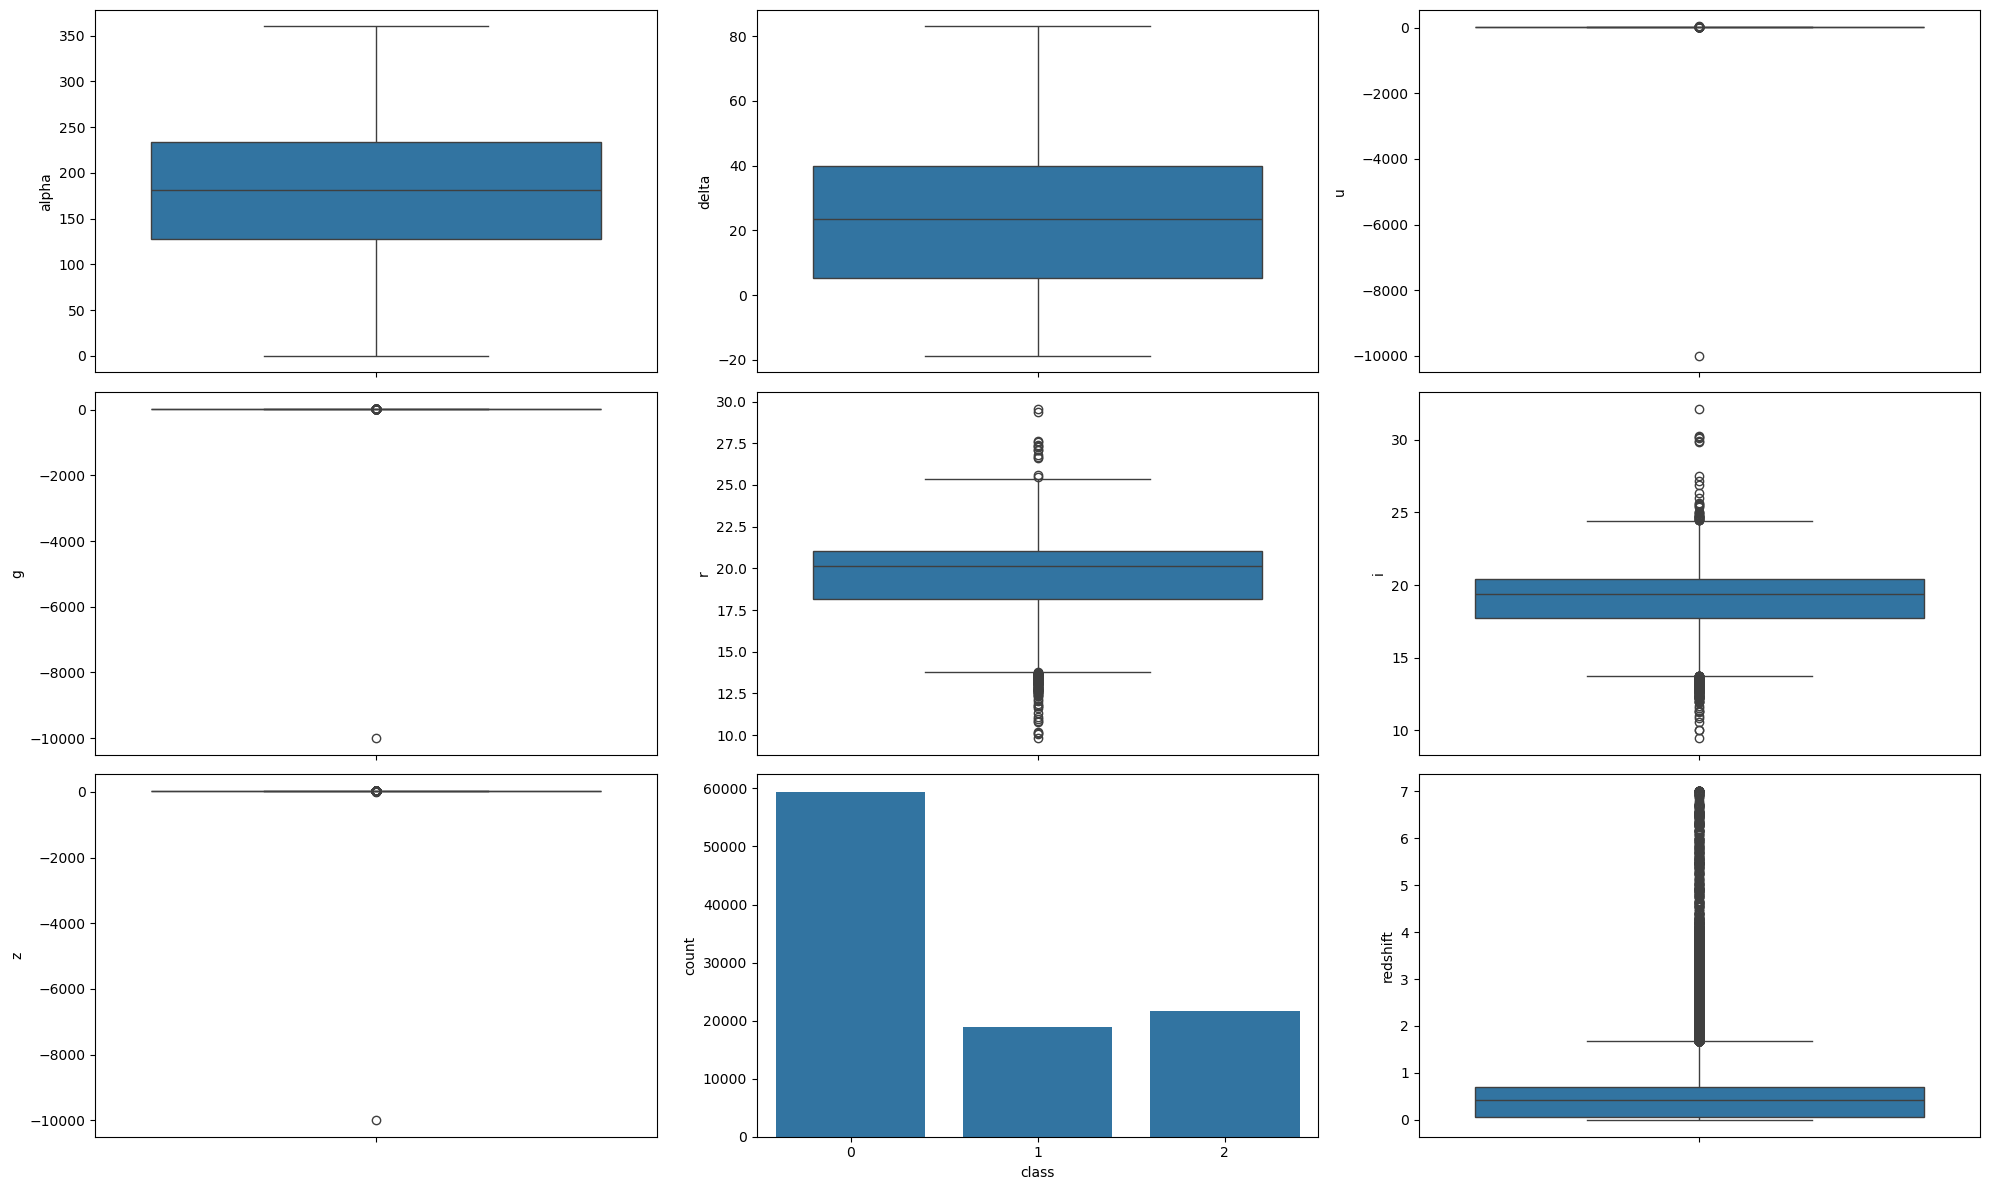

In [84]:
plt.figure(figsize=(20, 12))
for index, column in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    if column != "class":
        sns.boxplot(data, y=column)
    else:
        sns.countplot(data, x=column)
plt.tight_layout()
plt.show()

In [85]:
def iqr(data, column): 
    q3 = data[column].quantile(0.75) #3er cuartil
    q1 = data[column].quantile(0.25) #1er cuartil
    superior_limit = q3 + 1.5*(q3 - q1)
    inferior_limit = q1 - 1.5*(q3 - q1)
    return data[(data[column] < superior_limit) & (data[column] > inferior_limit)] #Selects data

In [86]:
for col in data.columns: 
    if col != "class":
        data = iqr(data, col) 
data

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0,0.455040


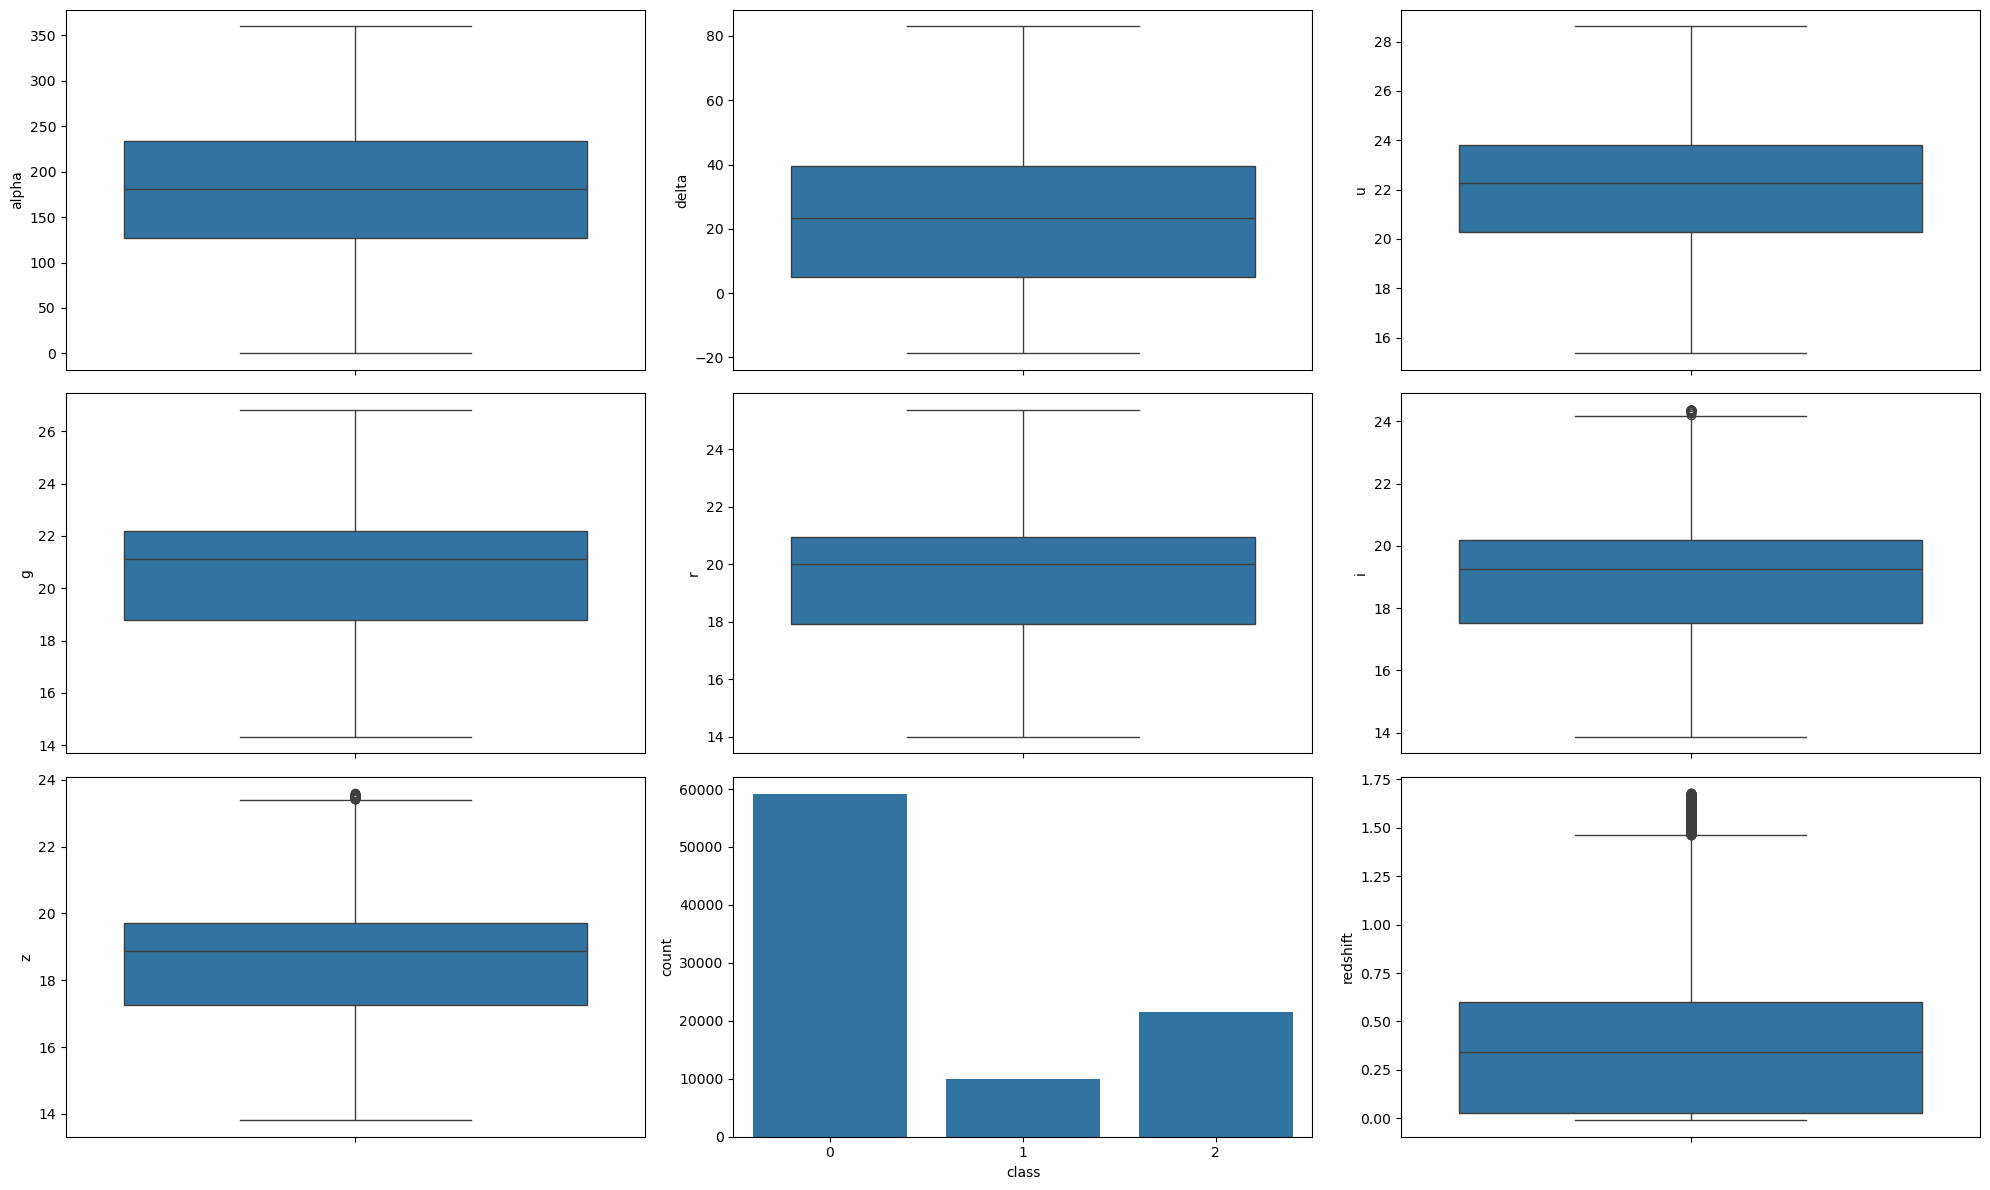

In [87]:
plt.figure(figsize=(20, 12))
for index, column in enumerate(data.columns):
    plt.subplot(3,3,index+1)
    if column != "class":
        sns.boxplot(data, y=column)
    else:
        sns.countplot(data, x=column)
plt.tight_layout()
plt.show()

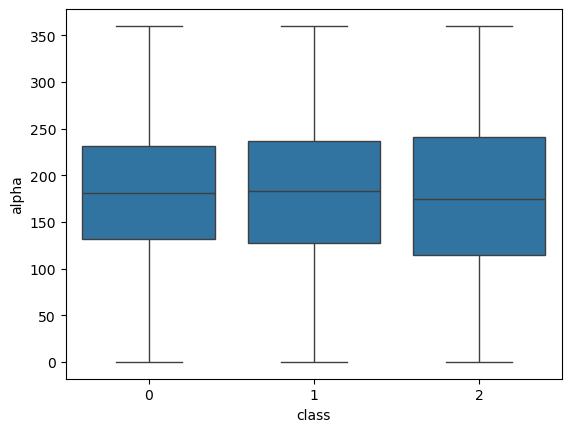

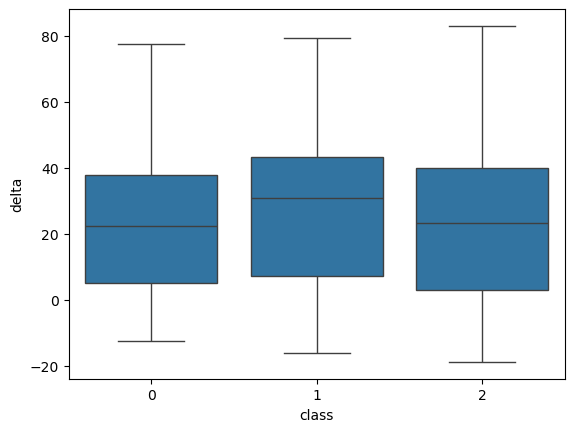

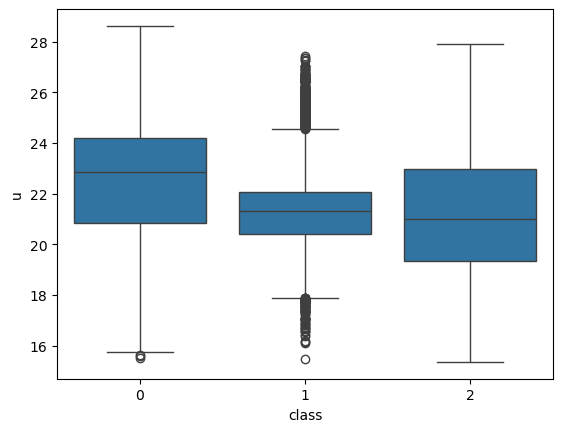

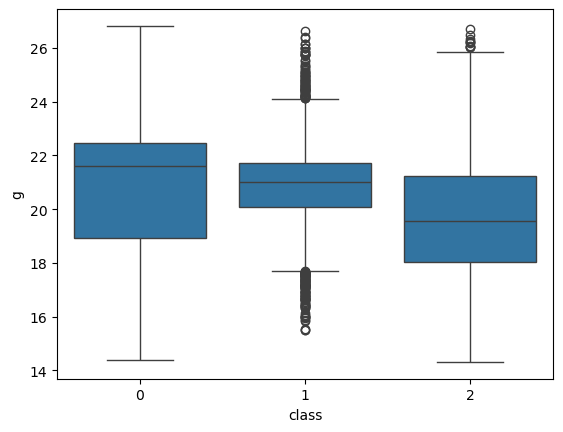

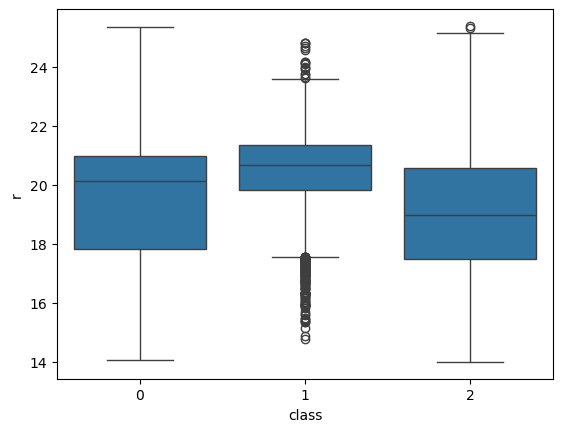

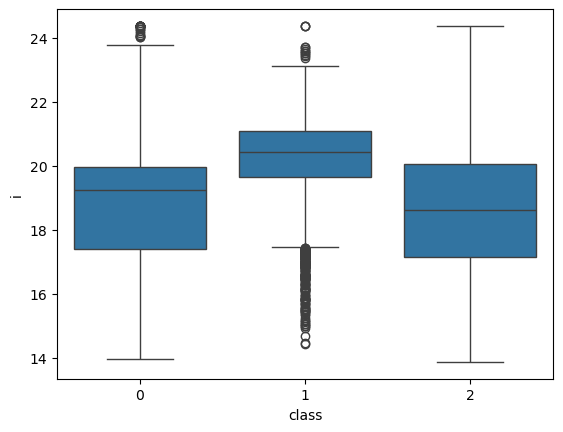

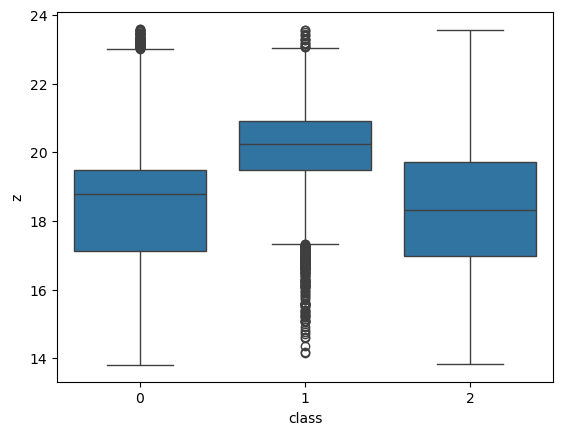

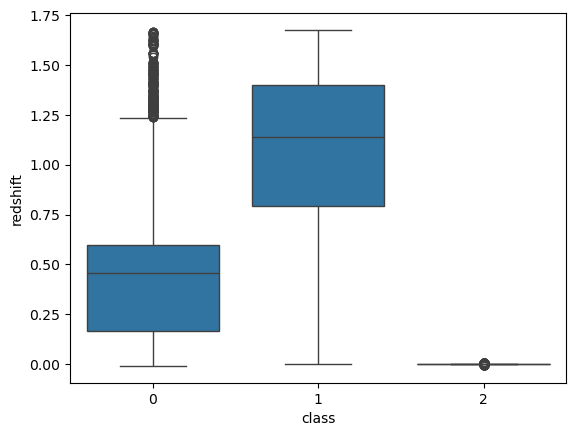

In [88]:
for column in data.columns:
    if column != "class":
        sns.boxplot(data, y=column, x="class")
        plt.show()

In [89]:
data.columns


Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

In [90]:
X = data.drop(columns=["alpha", "delta", "class"])
y = data["class"]

<Axes: >

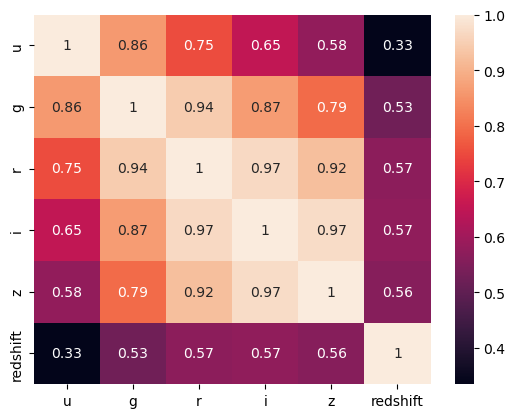

In [91]:
sns.heatmap(X.corr(), annot=True)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67950, 6), (22650, 6), (67950,), (22650,))

In [93]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [94]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.78339957, 0.12112359, 0.07617807, 0.01434199, 0.003214  ,
       0.00174278])

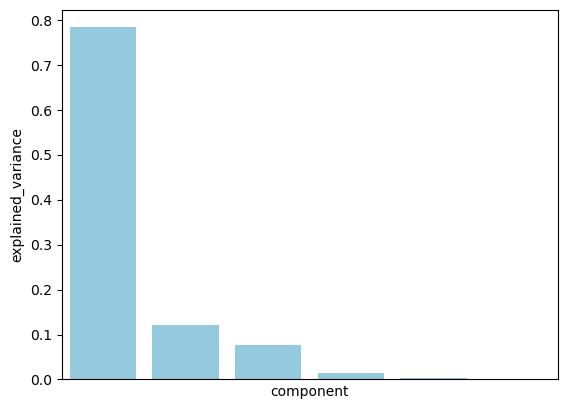

In [95]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) 
exp_variance["component"] = exp_variance.index + 1 
exp_variance = exp_variance.rename(columns={0: "explained_variance"}) 
sns.barplot(exp_variance, x="component", y = "explained_variance", color="skyblue") 
plt.xticks([]) 
plt.show() 

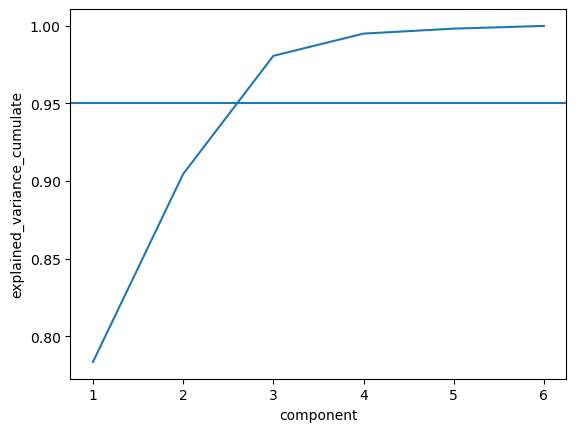

In [96]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum() #Cummulative sum
sns.lineplot(exp_variance, x = "component", y="explained_variance_cumulate") #Plots
plt.axhline(0.95)  #Plots line at 95% of variance
plt.show() #Display

In [97]:
pca = PCA(4)
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [98]:
X_train


array([[ 1.18279107,  1.00168706,  0.71258021,  0.45556171,  0.30415861,
         0.48496744],
       [ 0.37442977,  0.86452175,  1.24774283,  1.48014616,  2.1298172 ,
         1.05765579],
       [ 0.49045974,  0.29226073,  0.01346142, -0.19938217, -0.34399807,
        -1.01464559],
       ...,
       [-1.07767705, -1.10432409, -0.92728921, -0.75563116, -0.588696  ,
        -1.01362543],
       [ 0.81073334,  0.69081236,  0.59973483,  0.48657561,  0.50447356,
         0.3059183 ],
       [ 1.25008251,  0.45682448,  0.23957324,  0.0393828 , -0.10063549,
         0.35486919]])

<Axes: xlabel='0', ylabel='1'>

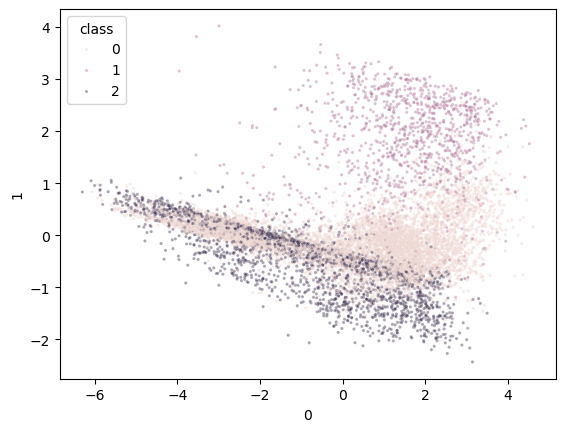

In [99]:
sns.scatterplot(pd.DataFrame(X_train_trans, index=y_train.index).sample(10000), x=0, y=1, hue=y_train , alpha=0.4, s = 5)

In [100]:
print(data.columns)


Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')


In [101]:
df = pd.read_csv('star.csv')
df.columns = df.columns.str.strip()

class_encoder = LabelEncoder()
df['class'] = class_encoder.fit_transform(df['class'])

X = df[['u', 'g', 'r', 'i', 'z', 'redshift']]
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

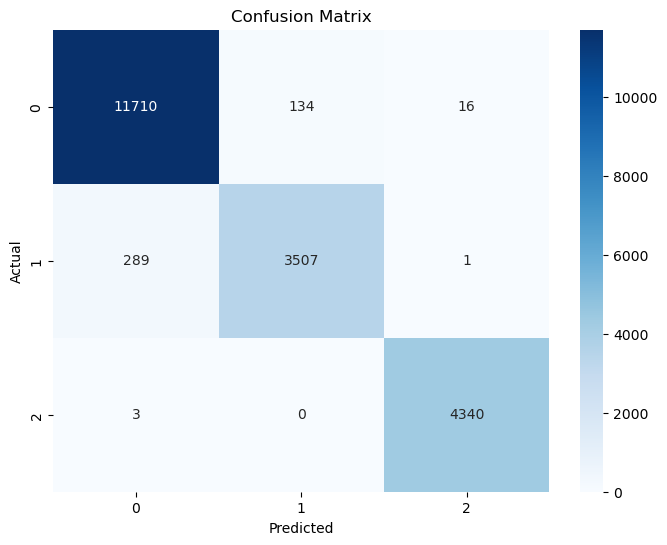

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

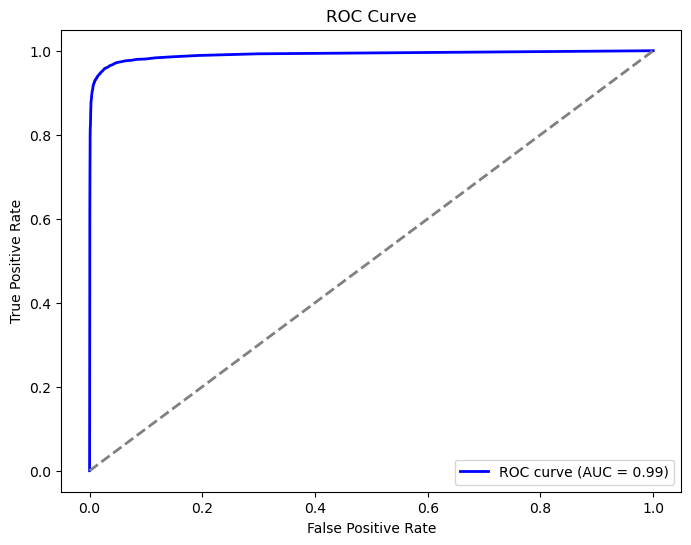

In [103]:


y_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1], pos_label=1)  # Use the class 1 probability for ROC

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line representing random guesses
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

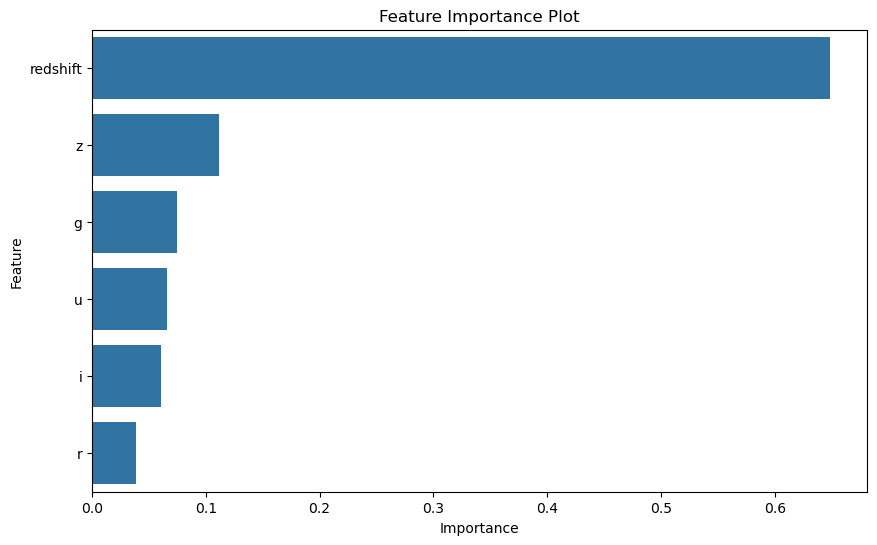

In [104]:
importances = model.feature_importances_

features = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.sort_values('Importance', ascending=False))
plt.title('Feature Importance Plot')
plt.show()

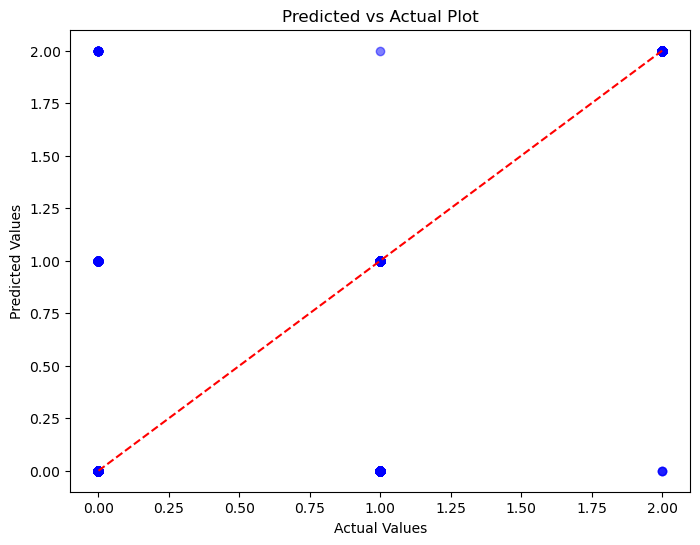

In [105]:
y_pred_test = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Plot')
plt.show()

In [106]:
accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('Classification Report:')
print(classification_report(y_test, y_pred_test))

Accuracy: 97.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11860
           1       0.96      0.92      0.94      3797
           2       1.00      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [107]:
custom_input = pd.DataFrame([{
    'u': 17.5,
    'g': 17.8,
    'r': 17.2,
    'i': 14.9,
    'z': 16.7,
    'redshift': 0.1
}])

custom_input_scaled = scaler.transform(custom_input)

prediction = model.predict(custom_input_scaled)
predicted_class = class_encoder.inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)


Predicted Class: QSO
